# Excercse MNIST
1. complete the training process
2. Get the MAX accuracy and MIN loss of your final model

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.2.0'

In [3]:
# Define Parameters
num_classes = 10
img_size = 28

#### Prepare Data

In [4]:
# download from google drive
!gdown --id '1R8xj7WxyQhR15jS_GS7tTiunTVBxUg6j' --output mnist.npz

Permission denied: https://drive.google.com/uc?id='1R8xj7WxyQhR15jS_GS7tTiunTVBxUg6j'
Maybe you need to change permission over 'Anyone with the link'?


In [5]:
# Load Data from file
with np.load('mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test = f['x_test']

# Data shape
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [6]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

x_train.shape, x_val.shape, x_train.shape, y_val.shape

((45000, 28, 28), (15000, 28, 28), (45000, 28, 28), (15000,))

In [7]:
# Flatten img to a vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# normalization to 0 ~ 1
x_train = x_train / 255.
x_val = x_val / 255.  
x_test = x_test / 255.

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes=num_classes)
y_val = utils.to_categorical(y_val, num_classes=num_classes)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((45000, 784), (15000, 784), (45000, 10), (15000, 10))

#### Build Model

In [8]:
# DNN model
model = Sequential([
  layers.Dense(512, activation='relu', input_shape=(img_size*img_size,)),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Training

In [11]:
score = model.fit(x = x_train, y = y_train, validation_split=0.1, epochs=100, batch_size=300)

Epoch 1/100
135/135 [==============================] - 4s 29ms/step - loss: 1.1958 - accuracy: 0.5768 - val_loss: 0.3081 - val_accuracy: 0.9258
Epoch 2/100
135/135 [==============================] - 4s 29ms/step - loss: 0.4373 - accuracy: 0.8847 - val_loss: 0.1932 - val_accuracy: 0.9556
Epoch 3/100
135/135 [==============================] - 4s 30ms/step - loss: 0.2923 - accuracy: 0.9274 - val_loss: 0.1681 - val_accuracy: 0.9616
Epoch 4/100
135/135 [==============================] - 5s 35ms/step - loss: 0.2300 - accuracy: 0.9448 - val_loss: 0.1424 - val_accuracy: 0.9680
Epoch 5/100
135/135 [==============================] - 4s 29ms/step - loss: 0.1923 - accuracy: 0.9551 - val_loss: 0.1605 - val_accuracy: 0.9667
Epoch 6/100
135/135 [==============================] - 4s 31ms/step - loss: 0.1597 - accuracy: 0.9618 - val_loss: 0.1465 - val_accuracy: 0.9689
Epoch 7/100
135/135 [==============================] - 4s 30ms/step - loss: 0.1474 - accuracy: 0.9652 - val_loss: 0.1353 - val_accuracy:

In [16]:
scores = model.evaluate(x_train, y_train, verbose=0)
print(f'train loss: {scores[0]}, train acc: {scores[1]}')   
 
pred_test= model.predict(x_val)
scores2 = model.evaluate(x_val, y_val, verbose=0)
print(f'test loss: {scores2[0]}, test acc: {scores2[1]}')

train loss: 0.026312891393899918, train acc: 0.9978222250938416
test loss: 0.21080930531024933, test acc: 0.9832000136375427


#### Generate file for Kaggle

In [13]:
# predict by your model
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

df = pd.DataFrame()
df['Id'] = [str(i) for i in range(len(x_test))]
df['Category'] = predictions
df.to_csv('result.csv', index=None)
df

,Id,Category
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


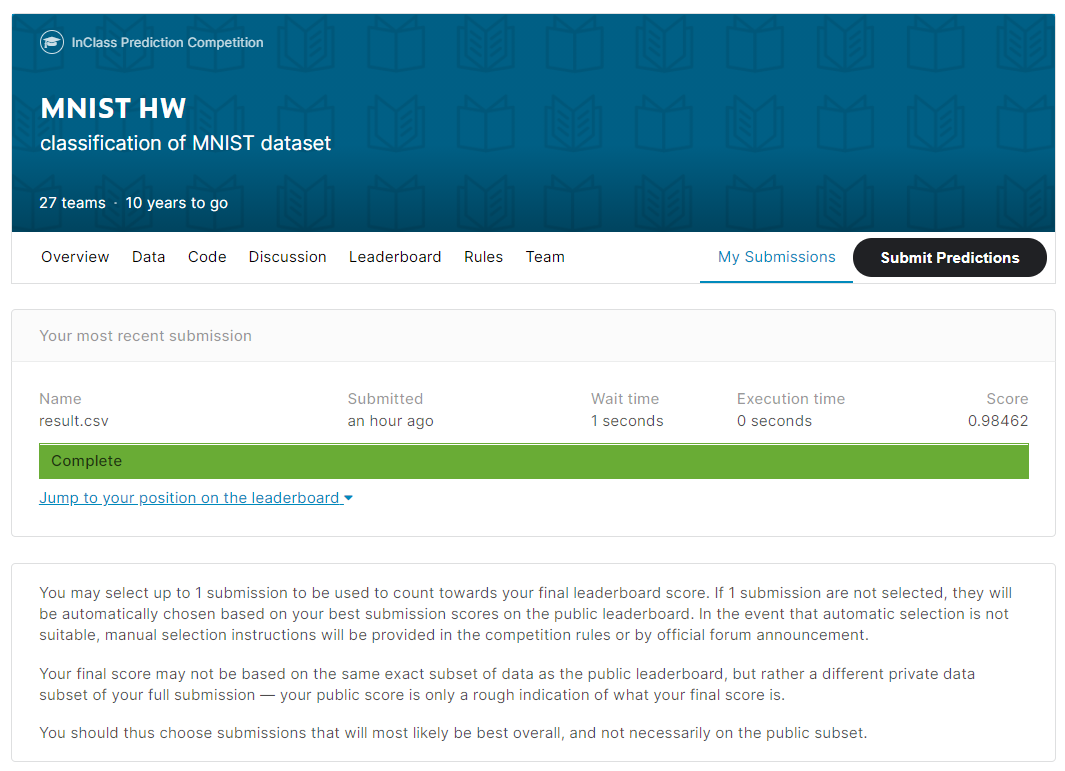

In [1]:
from IPython.display import Image
Image(filename='kaggle.png')